## This is the notebook used to generate the dataset used on the FKLearn Tutorial.ipynb
* The FKLearn Tutorial notebook was used to introduce FKLearn on Nubank's Data Science Meetup and the idea was to give an overall idea on how and why you should use FKLearn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [3]:
ids = range(0, 10000)
months = range(1, 24)

In [4]:
unique_entries = np.array(np.meshgrid(ids, months)).T.reshape(-1, 2)

In [5]:
unique_entries.shape

(230000, 2)

In [6]:
np.power(np.array([months]), 0.1) 

array([[1.        , 1.07177346, 1.11612317, 1.14869835, 1.17461894,
        1.1962312 , 1.21481404, 1.23114441, 1.24573094, 1.25892541,
        1.27098162, 1.28208885, 1.29239222, 1.30200545, 1.31101942,
        1.31950791, 1.32753167, 1.33514136, 1.34237965, 1.34928285,
        1.35588211, 1.36220437, 1.36827308]])

In [7]:

X = get_truncated_normal(5000, 2000, 300, 20000)
income_by_id = X.rvs(len(ids))
income_by_id = np.repeat(income_by_id, len(months))
income_wrong_entry = np.random.binomial(1, 1 - 0.05, unique_entries.shape[0]).astype(bool)
income_array = np.where(income_wrong_entry == True, income_by_id.reshape(1, -1), 9999999)

In [8]:
income_array.shape

(1, 230000)

(array([6.9000e+02, 2.7140e+03, 3.9790e+03, 6.4630e+03, 8.1190e+03,
        1.1983e+04, 1.5410e+04, 1.9527e+04, 2.2126e+04, 2.2586e+04,
        2.3115e+04, 2.1919e+04, 1.8860e+04, 1.5686e+04, 1.1776e+04,
        9.1540e+03, 6.4630e+03, 4.2320e+03, 2.4150e+03, 1.3800e+03,
        7.5900e+02, 2.3000e+02, 1.3800e+02, 1.8400e+02, 6.9000e+01,
        2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
         4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
         9000,  9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000,
        13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500,
        18000, 18500, 19000, 19500]),
 <a list of 39 Patch objects>)

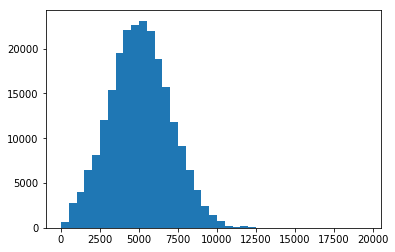

In [9]:
plt.hist(income_by_id, bins = range(0, 20000, 500)) 

In [10]:
customer_creation_date = []
for m_id in np.random.choice(len(months) * 31, len(ids)):
    customer_creation_date.append(np.datetime64("2017-01-01") + np.timedelta64(int(m_id), 'D'))
customer_creation_date = np.repeat(np.array(customer_creation_date), len(months))

In [11]:
phone_branches = ["samsung", "motorola", "iphone", "lg"]
random_phone = np.random.choice(4, len(ids), p=[0.15, 0.3, 0.25, 0.3])
cellphone_branch = [phone_branches[i] for i in random_phone]
cellphone_branch = np.repeat(cellphone_branch, len(months))
phone_factor = [0.7, 0.3, 0.9, 0.45]
cellphone_factor = [phone_factor[i] for i in random_phone]
cellphone_factor = np.repeat(cellphone_factor, len(months))

In [12]:
cellphone_factor

array([0.9, 0.9, 0.9, ..., 0.9, 0.9, 0.9])

In [14]:
bureau_missing = np.random.binomial(1, 1 - 0.1, unique_entries.shape[0]).astype(bool)
Y = get_truncated_normal(500, 250, 0, 1000)
bureau_score = Y.rvs(unique_entries.shape[0])
monthly_factor = np.tile(np.power(np.array(months), 0.2), len(ids))
bureau_score = np.where(bureau_missing == True, bureau_score, np.nan) / monthly_factor

In [15]:
bureau_score

array([138.36878714, 446.63891167, 345.03048281, ..., 214.94502744,
       394.86478535, 404.04034416])

(array([ 2219.,  2893.,  3887.,  4885.,  6051.,  7400.,  8846., 10148.,
        11216., 12247., 12831., 13092., 13213., 12863., 12429., 11444.,
        10425.,  9257.,  8174.,  7039.,  5843.,  4797.,  3668.,  2763.,
         2145.,  1635.,  1265.,   980.,   804.,   617.,   461.,   369.,
          274.,   245.,   187.,   109.,    83.,    76.,    65.]),
 array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
        325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625,
        650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950,
        975]),
 <a list of 39 Patch objects>)

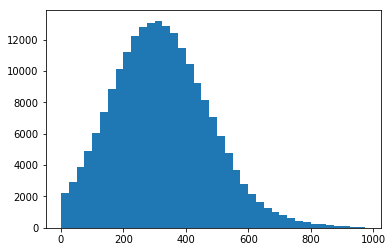

In [16]:
plt.hist(bureau_score, bins = range(0, 1000, 25)) 

In [17]:
willingness_to_spend = np.repeat(np.random.normal(500, 200, len(ids)), len(months))

In [18]:
willingness_to_spend

array([475.64208228, 475.64208228, 475.64208228, ..., 417.47630026,
       417.47630026, 417.47630026])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00,
        4.6000e+01, 4.6000e+01, 1.3800e+02, 3.2200e+02, 6.9000e+02,
        1.4950e+03, 2.6450e+03, 4.1400e+03, 6.0950e+03, 9.4300e+03,
        1.1776e+04, 1.4973e+04, 1.8722e+04, 2.1206e+04, 2.3276e+04,
        2.2149e+04, 2.1850e+04, 1.8883e+04, 1.6031e+04, 1.2121e+04,
        8.9240e+03, 6.6930e+03, 3.4500e+03, 2.2080e+03, 1.4260e+03,
        5.0600e+02, 4.1400e+02, 1.1500e+02, 1.6100e+02, 2.3000e+01,
        0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00]),
 array([-1000,  -950,  -900,  -850,  -800,  -750,  -700,  -650,  -600,
         -550,  -500,  -450,  -400,  -350,  -300,  -250,  -200,  -150,
         -100,   -50,     0,    50,   100,   150,   200,   250,   300,
          350,   400,   450,   500,   550,   600,   650,   700,   750,
          800,   850,   900,   950,  1000,  10

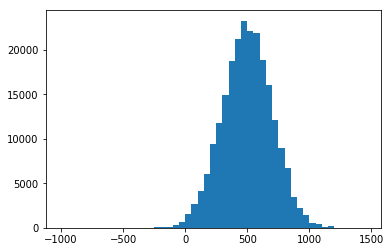

In [19]:
plt.hist(willingness_to_spend, bins = range(-1000, 1500, 50)) 

In [25]:
noise_feature = np.random.normal(1000, 100, unique_entries.shape[0])

In [20]:
a = (willingness_to_spend)
a_norm = (a - a.min()) / (a.max() - a.min())
b = (income_array)
b_norm = (b - b.min()) / (b.max() - b.min())
c = cellphone_factor * willingness_to_spend
c_norm = (c - c.min()) / (c.max() - c.min())
d = (np.where(np.isnan(bureau_score), 300.0, bureau_score))
d_norm = (d - d.min()) / (d.max() - d.min())
e = np.random.normal(1, 0.3, unique_entries.shape[0])
W = get_truncated_normal(2000, 300, 0, 50000)
spend = (a_norm + b_norm + c_norm + d_norm + e) * W.rvs(unique_entries.shape[0])

In [21]:
spend

array([[3903.7149326 , 5233.42008627, 4779.35121024, ..., 4635.02079105,
        4875.81617126, 4306.08069142]])

In [22]:
spend.shape

(1, 230000)

In [23]:
income_array.shape

(1, 230000)

In [26]:
initial_df = (pd.DataFrame(
    unique_entries, columns=["id", "month"]
).assign(
       income=income_array.T,
       created_at=customer_creation_date.T,
       phone_type=cellphone_branch.T,
       bureau_score=bureau_score.T,
       spend_desire=willingness_to_spend.T,
       random_noise=noise_feature.T,
       monthly_spend=spend.T,
       month_date=lambda df: df.month * 31 + np.datetime64("2017-01-01")
)
.loc[lambda df: df.month_date >= df.created_at])


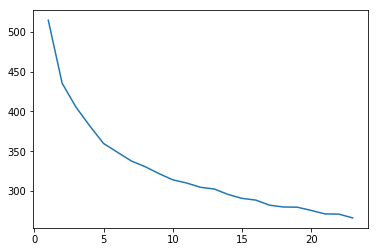

In [27]:
plt.plot(sorted(initial_df.month.unique()), initial_df.groupby("month").agg({"bureau_score": "mean"}))

In [28]:
initial_df

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date
18,0,19,4.522164e+03,2018-07-20,iphone,267.004052,475.642082,1075.560506,5295.632425,2018-08-13
19,0,20,4.522164e+03,2018-07-20,iphone,347.215587,475.642082,961.373740,4844.845213,2018-09-13
20,0,21,4.522164e+03,2018-07-20,iphone,360.962387,475.642082,875.161326,4667.452766,2018-10-14
21,0,22,4.522164e+03,2018-07-20,iphone,175.148355,475.642082,845.662587,4509.010335,2018-11-14
22,0,23,4.522164e+03,2018-07-20,iphone,196.706717,475.642082,919.350552,4346.691470,2018-12-15
36,1,14,4.932133e+03,2018-03-11,motorola,220.114076,961.840911,1013.337788,5010.602264,2018-03-11
37,1,15,4.932133e+03,2018-03-11,motorola,338.933881,961.840911,959.259152,5296.788887,2018-04-11
38,1,16,4.932133e+03,2018-03-11,motorola,239.669947,961.840911,1034.285330,5642.014260,2018-05-12
39,1,17,4.932133e+03,2018-03-11,motorola,226.645581,961.840911,923.345615,2941.412853,2018-06-12
40,1,18,4.932133e+03,2018-03-11,motorola,288.619854,961.840911,861.151807,3935.041739,2018-07-13


In [29]:
with_target_df = (initial_df.groupby("id", as_index=False).apply(lambda df: df
                                .assign(
                                       avg_last_2_months_spend=lambda x: x.monthly_spend.rolling(2).mean(),
                                       target=lambda x: x.avg_last_2_months_spend.shift(-2)))
                 .reset_index(drop=True))

In [30]:
with_target_df

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target
0,0,19,4.522164e+03,2018-07-20,iphone,267.004052,475.642082,1075.560506,5295.632425,2018-08-13,NaN,4756.148989
1,0,20,4.522164e+03,2018-07-20,iphone,347.215587,475.642082,961.373740,4844.845213,2018-09-13,5070.238819,4588.231550
2,0,21,4.522164e+03,2018-07-20,iphone,360.962387,475.642082,875.161326,4667.452766,2018-10-14,4756.148989,4427.850902
3,0,22,4.522164e+03,2018-07-20,iphone,175.148355,475.642082,845.662587,4509.010335,2018-11-14,4588.231550,NaN
4,0,23,4.522164e+03,2018-07-20,iphone,196.706717,475.642082,919.350552,4346.691470,2018-12-15,4427.850902,NaN
5,1,14,4.932133e+03,2018-03-11,motorola,220.114076,961.840911,1013.337788,5010.602264,2018-03-11,NaN,5469.401573
6,1,15,4.932133e+03,2018-03-11,motorola,338.933881,961.840911,959.259152,5296.788887,2018-04-11,5153.695575,4291.713556
7,1,16,4.932133e+03,2018-03-11,motorola,239.669947,961.840911,1034.285330,5642.014260,2018-05-12,5469.401573,3438.227296
8,1,17,4.932133e+03,2018-03-11,motorola,226.645581,961.840911,923.345615,2941.412853,2018-06-12,4291.713556,4722.590808
9,1,18,4.932133e+03,2018-03-11,motorola,288.619854,961.840911,861.151807,3935.041739,2018-07-13,3438.227296,5116.067742


In [31]:
with_target_df.to_csv("fklearn-tutorial-input-dataset.csv", index=False)